In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_context('notebook',font_scale=1.3)

In [4]:
def read_agent_data(atype,K,N,C0,V0,*,prefix,datadir):
    fname = f'{prefix}-{atype}_C0={C0}_K={K}_N={N}_V0={V0}_betam0=1.0_betaw0=1.0.csv'
    df = pd.read_csv(datadir+fname)
    d = N*(K + N-1)
    df['mean_distrust_transitivity'] *= -1
    df['alpha'] = np.log(1+df.P)/np.log(K)
    df['tau'] = df.step/d
#     df['agent_type'] = "Matrix Covariance" if atype == 'ODAgent' else "Scalar Covariance"
    df['K'] = K
#    df['N'] = N
#    df['C0'] = C0
#    df['V0'] = V0
    return df

def load_agent_tables(atypes,Ks,Ns,C0s,V0s,*,prefix='transitivity-spinglass',datadir="../data/sims/transitivity-balance/"):
    df = pd.concat([read_agent_data(atype,K,N,C0,V0,prefix=prefix,datadir=datadir) 
                    for atype in atypes
                    for K in Ks 
                    for N in Ns
                    for C0 in C0s
                    for V0 in V0s])
    return df

def tidy_agent_data(data):
    obs = ['mean_agreement_transitivity','mean_distrust_transitivity']
    ids = set(data.columns.to_list()).difference(obs)
    melted = data.melt(id_vars=ids,value_vars=obs,var_name='transitivity_var',value_name='transitivity_val')
    melted['transitivity_var'] = melted['transitivity_var'].transform(lambda x: 'Balance based on Opinion' if ('agreement' in x) else 'Balance based on Distrust')
    return melted

In [48]:
nonbayesian_balance_df = tidy_agent_data(load_agent_tables(['ODAgentIHC'],[5,30],[20],[10.0],[10.0],
                                                           datadir="../data/sims/transitivity-balance/",
                                                           prefix="transitivity-spinglass"))

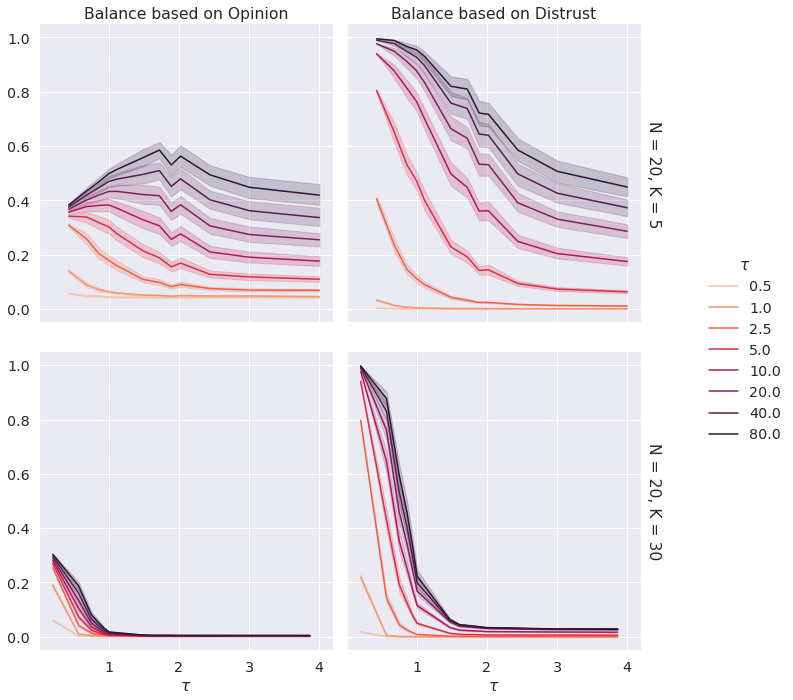

In [51]:
nonbayes_balance_x_alpha_plot = sns.relplot(
    data=nonbayesian_balance_df, kind='line',
    x='alpha', y='transitivity_val', hue='tau',row='K',col='transitivity_var',
    palette=sns.color_palette('rocket_r',n_colors=len(nonbayesian_df.tau.unique())),
    facet_kws={'margin_titles': True}, legend='full'
)

(nonbayes_balance_x_alpha_plot.map(plt.axvline, x=1, color=".9", dashes=(2, 1), zorder=0)
 .set_axis_labels(r"$\tau$")
 .set_titles(row_template="N = 20, K = {row_name}", col_template="{col_name}")
 .tight_layout(w_pad=0))

nonbayes_balance_x_alpha_plot.fig.subplots_adjust(wspace=0.05,hspace=0.1)
nonbayes_balance_x_alpha_plot.legend.set_title(r'$\tau$')

In [46]:
bayesian_balance_df = tidy_agent_data(load_agent_tables(['ODAgent'],[5,30],[20],[10.0],[10.0],
                                                       datadir="../data/sims/transitivity-balance/",
                                                       prefix="transitivity-spinglass"))

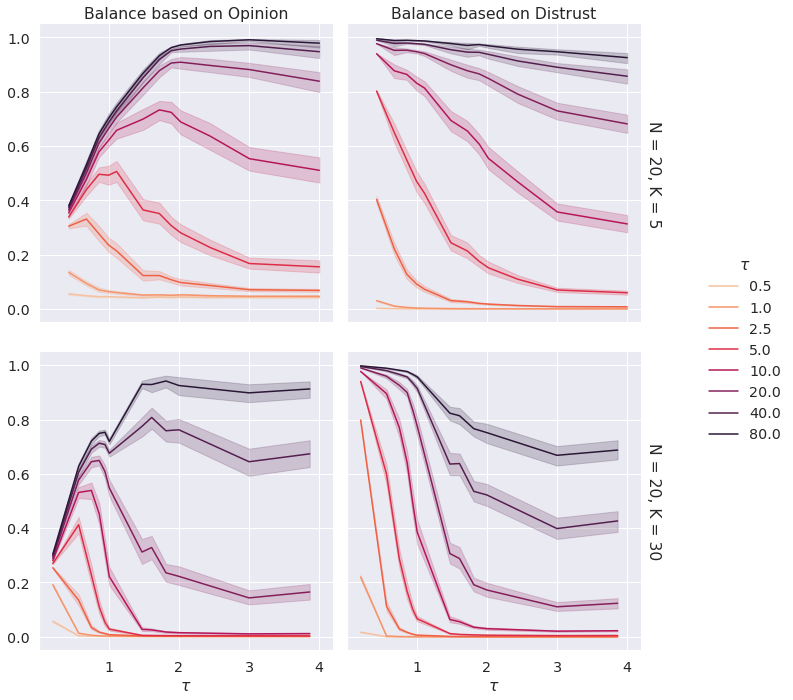

In [52]:
bayes_balance_x_alpha_plot = sns.relplot(
    data=bayesian_balance_df, kind='line',
    x='alpha', y='transitivity_val', hue='tau',row='K',col='transitivity_var',
    palette=sns.color_palette('rocket_r',n_colors=len(nonbayesian_df.tau.unique())),
    facet_kws={'margin_titles': True}, legend='full'
)

(bayes_balance_x_alpha_plot.map(plt.axvline, x=1, color=".9", dashes=(2, 1), zorder=0)
 .set_axis_labels(r"$\tau$")
 .set_titles(row_template="N = 20, K = {row_name}", col_template="{col_name}")
 .tight_layout(w_pad=0))

bayes_balance_x_alpha_plot.fig.subplots_adjust(wspace=0.05,hspace=0.1)
bayes_balance_x_alpha_plot.legend.set_title(r'$\tau$')

In [53]:
plotdir = '../plots/simulations/Balance-plots/'
common_part = '_balance-x-logP-C0=10.0_V0=10.0_N=20.pdf'
bayes_fname = plotdir+'Bayesing_Agents'+common_part
nonbayes_fname = plotdir+'Non_Bayesing_Agents'+common_part
bayes_balance_x_alpha_plot.savefig(bayes_fname)
nonbayes_balance_x_alpha_plot.savefig(nonbayes_fname)